In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import os

base_path = "/g/stegle"

In [2]:
import gseapy as gp

In [3]:
def plot_vars_from_df(df, variables):
    plt.figure()

    for variable in variables:
        df_plot = df[df["variable"] == variable]
        plt.plot( df_plot["epoch"], df_plot["value"], label = variable)

    plt.legend()    
    plt.show()

In [10]:
log_path = "ueltzhoe/bicycle_main/bicycle/notebooks/experiments/frangieh/plots/nodags_split_False_adam_1024_True_61pretrain5000_0.1_1.0_0_10_1_0.001_0.1_1.0_0_10_0.001_0_False/last_log_train.csv"
df = pd.read_csv(os.path.join(base_path,log_path))

In [11]:
df.variable.unique()

array(['train_kl_train', 'train_nll_train'], dtype=object)

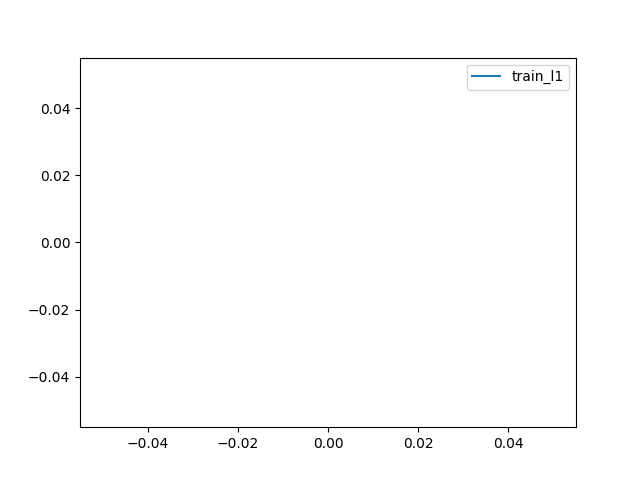

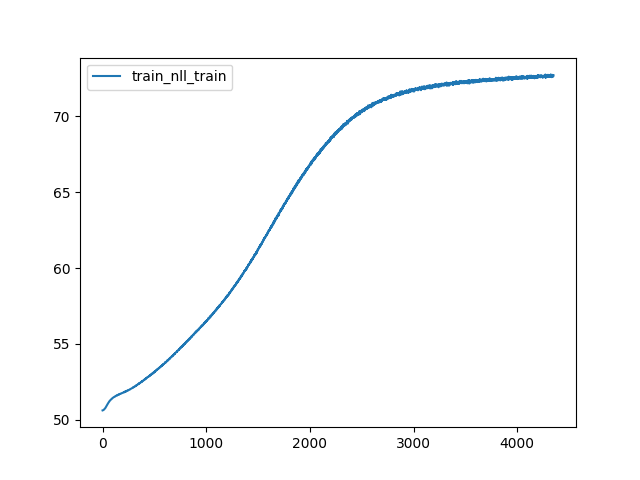

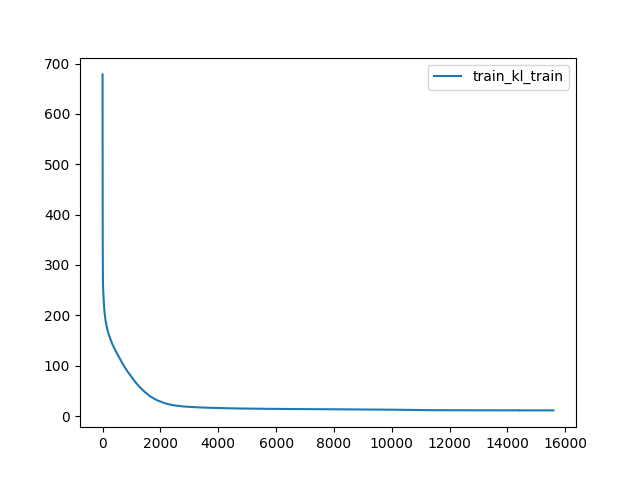

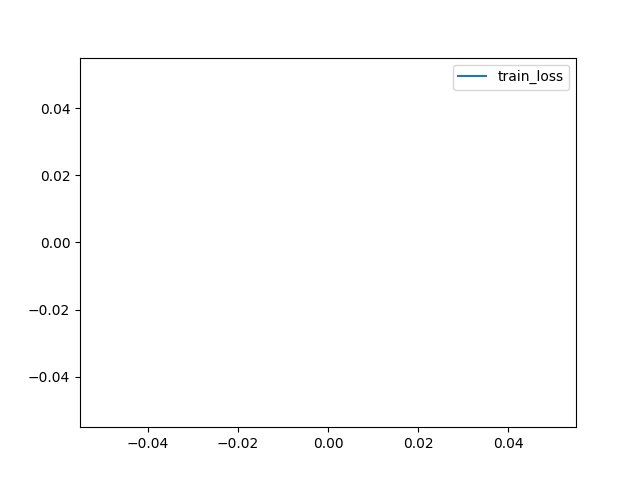

In [12]:
%matplotlib widget

import matplotlib.pyplot as plt

variables = [
    "train_l1",
    "train_nll_train",
    "train_kl_train",
    "train_loss"
]

for var in variables:
    plot_vars_from_df(df, [var])

In [14]:
import numpy as np

gene_list_path = '/scratch/ueltzhoe/nodags_data_counts/control/labels.npy'

gene_list = np.load(os.path.join(gene_list_path), allow_pickle=True)
gene_list

array(['ACSL3', 'ACTA2', 'B2M', 'CCND1', 'CD274', 'CD58', 'CD59', 'CDK4',
       'CDK6', 'CDKN1A', 'CKS1B', 'CST3', 'CTPS1', 'DNMT1', 'EIF3K',
       'EVA1A', 'FKBP4', 'FOS', 'GSEC', 'GSN', 'HASPIN', 'HLA-A', 'HLA-B',
       'HLA-C', 'HLA-E', 'IFNGR1', 'IFNGR2', 'ILF2', 'IRF3', 'JAK1',
       'JAK2', 'LAMP2', 'LGALS3', 'MRPL47', 'MYC', 'P2RX4', 'PABPC1',
       'PAICS', 'PET100', 'PTMA', 'PUF60', 'RNASEH2A', 'RRS1', 'SAT1',
       'SEC11C', 'SINHCAF', 'SMAD4', 'SOX4', 'SP100', 'SSR2', 'STAT1',
       'STOM', 'TGFB1', 'TIMP2', 'TM4SF1', 'TMED10', 'TMEM173', 'TOP1MT',
       'TPRKB', 'TXNDC17', 'VDAC2'], dtype=object)

In [15]:
import numpy as np

estimated_path = "ueltzhoe/bicycle_main/bicycle/notebooks/experiments/frangieh/plots/nodags_split_False_adam_1024_True_61pretrain5000_0.1_1.0_0_10_1_0.001_0.1_1.0_0_10_0.001_0_False/last_estimated_beta_epoch15000.npy"
estimated_beta = np.load(os.path.join(base_path,estimated_path))

# Apply threshold (optional)
#estimated_beta = np.abs(estimated_beta) > 5.0

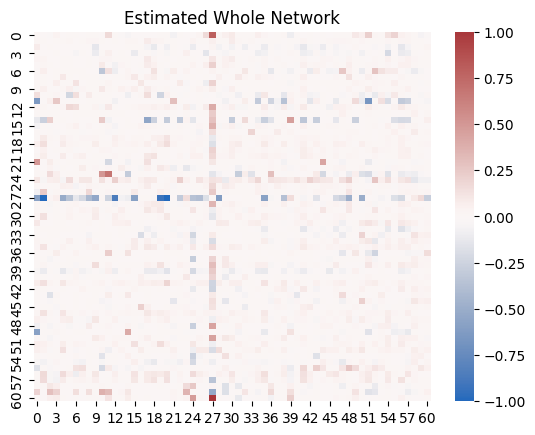

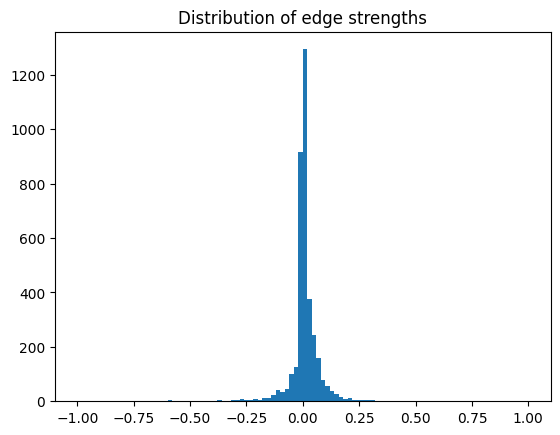

In [16]:
%matplotlib inline

import seaborn as sns

plt.figure()
plt.title("Estimated Whole Network")
sns.heatmap(estimated_beta[:,:],
            annot = False,
            annot_kws={"fontsize": 7},
            center=0,
            cmap="vlag",
            vmin = -1.0,
            vmax = 1.0
           )
plt.show()

plt.close()

plt.figure()
plt.title('Distribution of edge strengths')
plt.hist(estimated_beta.flatten(), range = [-1.0,1.0], bins = 100)
plt.show()

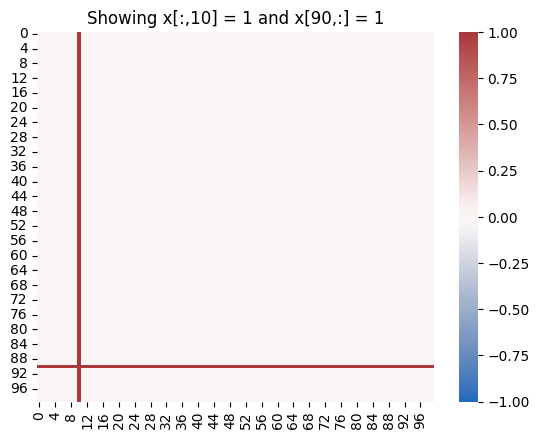

In [17]:
# REMEMBER: \beta_ij is the LINEAR EFFECT OF THE EXPRESSION OF GENE i 
#           on the TRANSCRIPTION RATE OF GENE j

plt.figure()
plt.title("Showing x[:,10] = 1 and x[90,:] = 1")
x = np.zeros((100,100))
x[:,10] = 1
x[90,:] = 1
sns.heatmap(x,
            annot = False,
            annot_kws={"fontsize": 7},
            center=0,
            cmap="vlag",
            vmin = -1.0,
            vmax = 1.0
           )
plt.show()

plt.close()

In [18]:
# REMEMBER: \beta_ij is the LINEAR EFFECT OF THE EXPRESSION OF GENE i 
#           on the TRANSCRIPTION RATE OF GENE j

print('TOTAL SUM:',np.abs(estimated_beta).sum())

parents = np.abs(estimated_beta).sum(axis = 0)
genes_sorted_by_parents = [{gene_list[i]: parents[i]} for i in np.argsort(-np.abs(parents)).squeeze().astype(int).tolist()]

children = np.abs(estimated_beta).sum(axis = 1)
genes_sorted_by_children = [{gene_list[i]: children[i]} for i in np.argsort(-np.abs(children)).squeeze().astype(int).tolist()]

degree = np.abs(estimated_beta).sum(axis = 1) + np.abs(estimated_beta).sum(axis = 0)
genes_sorted_by_degree = [{gene_list[i]: degree[i]} for i in np.argsort(-np.abs(degree)).squeeze().astype(int).tolist()]

TOTAL SUM: 139.37735


In [19]:
genes_sorted_by_degree[:20]

[{'ILF2': 25.545162},
 {'HLA-E': 9.82526},
 {'EIF3K': 8.410015},
 {'CST3': 8.1975565},
 {'ACSL3': 7.0002728},
 {'TMEM173': 6.5922484},
 {'HLA-C': 6.207781},
 {'RNASEH2A': 5.6029816},
 {'PTMA': 5.5848227},
 {'P2RX4': 5.4970417},
 {'TXNDC17': 5.4535527},
 {'TOP1MT': 5.406842},
 {'CKS1B': 5.401034},
 {'HASPIN': 5.32009},
 {'CTPS1': 5.0177217},
 {'TGFB1': 5.0091677},
 {'STOM': 4.8589582},
 {'VDAC2': 4.8504987},
 {'CD59': 4.8340235},
 {'TM4SF1': 4.7755175}]

In [20]:
genes_sorted_by_parents[:20]

[{'ILF2': 11.30335},
 {'HLA-E': 4.2923384},
 {'ACSL3': 4.2602363},
 {'ACTA2': 3.6221945},
 {'HASPIN': 3.4900422},
 {'CST3': 3.3111556},
 {'TMEM173': 3.2772887},
 {'P2RX4': 3.1997159},
 {'STOM': 3.1164007},
 {'FOS': 2.9982946},
 {'RNASEH2A': 2.977622},
 {'CKS1B': 2.7620695},
 {'TGFB1': 2.7494187},
 {'TOP1MT': 2.7187102},
 {'TM4SF1': 2.6764326},
 {'STAT1': 2.5886884},
 {'GSN': 2.573617},
 {'SP100': 2.5530524},
 {'PTMA': 2.5264928},
 {'SOX4': 2.4850922}]

In [21]:
genes_sorted_by_children[:20]

[{'ILF2': 14.241813},
 {'EIF3K': 6.0944934},
 {'HLA-E': 5.532922},
 {'CST3': 4.8864007},
 {'HLA-C': 4.392091},
 {'TXNDC17': 4.155202},
 {'TMEM173': 3.3149598},
 {'VDAC2': 3.2268264},
 {'PTMA': 3.0583298},
 {'CD59': 3.045305},
 {'TMED10': 2.8864648},
 {'ACSL3': 2.7400362},
 {'CTPS1': 2.6993742},
 {'TOP1MT': 2.688132},
 {'CKS1B': 2.6389644},
 {'RNASEH2A': 2.6253598},
 {'P2RX4': 2.297326},
 {'TGFB1': 2.2597487},
 {'GSEC': 2.1808472},
 {'TM4SF1': 2.099085}]

In [26]:
sum_thresh = 1.5
category = parents # parents or children

nodes_list = [gene_list[i] for i,p in enumerate(parents) if abs(p) > sum_thresh ]               
             

print(len(nodes_list))

49


In [27]:
# if you are only intrested in dataframe that enrichr returned, please set outdir=None
enr = gp.enrichr(gene_list=nodes_list, # or "./tests/data/gene_list.txt",
                 gene_sets=['MSigDB_Hallmark_2020','KEGG_2021_Human'],#'MSigDB_Hallmark_2020','KEGG_2021_Human'],
                 organism='human', # don't forget to set organism to the one you desired! e.g. Yeast
                 outdir=None, # don't write to disk
                )

enr.results.groupby('Gene_set').head(20)

,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes
0,MSigDB_Hallmark_2020,Interferon Gamma Response,7/200,5.418489e-07,6.682803e-06,0,0,17.062176,246.177831,CD274;CDKN1A;STAT1;HLA-B;HLA-A;JAK2;B2M
1,MSigDB_Hallmark_2020,p53 Pathway,7/200,5.418489e-07,6.682803e-06,0,0,17.062176,246.177831,CDKN1A;TGFB1;TPRKB;STOM;FOS;SAT1;TM4SF1
2,MSigDB_Hallmark_2020,Allograft Rejection,7/200,5.418489e-07,6.682803e-06,0,0,17.062176,246.177831,TGFB1;STAT1;IFNGR2;HLA-A;JAK2;B2M;HLA-E
3,MSigDB_Hallmark_2020,Androgen Response,5/100,4.524523e-06,4.185184e-05,0,0,23.751196,292.282180,CDK6;CCND1;ACSL3;B2M;SAT1
4,MSigDB_Hallmark_2020,TNF-alpha Signaling via NF-kB,6/200,9.068384e-06,6.710604e-05,0,0,14.210261,164.991315,CDKN1A;CCND1;MYC;IFNGR2;FOS;SAT1
5,MSigDB_Hallmark_2020,Apoptosis,5/161,4.550120e-05,2.805907e-04,0,0,14.419435,144.162218,CDKN1A;GSN;CCND1;VDAC2;SAT1
6,MSigDB_Hallmark_2020,Estrogen Response Late,5/200,1.268748e-04,5.867958e-04,0,0,11.512821,103.296595,RNASEH2A;CCND1;FOS;JAK2;JAK1
7,MSigDB_Hallmark_2020,E2F Targets,5/200,1.268748e-04,5.867958e-04,0,0,11.512821,103.296595,CDKN1A;RNASEH2A;MYC;CTPS1;CKS1B
8,MSigDB_Hallmark_2020,IL-6/JAK/STAT3 Signaling,3/87,1.267635e-03,3.822303e-03,0,0,15.424689,102.891969,TGFB1;STAT1;IFNGR2
9,MSigDB_Hallmark_2020,G2-M Checkpoint,4/200,1.446277e-03,3.822303e-03,0,0,8.959184,58.581977,TGFB1;CCND1;MYC;CKS1B
